# Exponential smoothing method
### exponential moving average (EMA)
### EWMA (Exponentially Weighted Moving Average) It's also known as auto-regressive (AR) filtering

In [4]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import gauss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import random
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
# general settings
class CFG:
    data_folder = '/tf/notebooks/time_series/'
    img_dim1 = 20
    img_dim2 = 10
    
    
# adjust the parameters for displayed figures    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})  

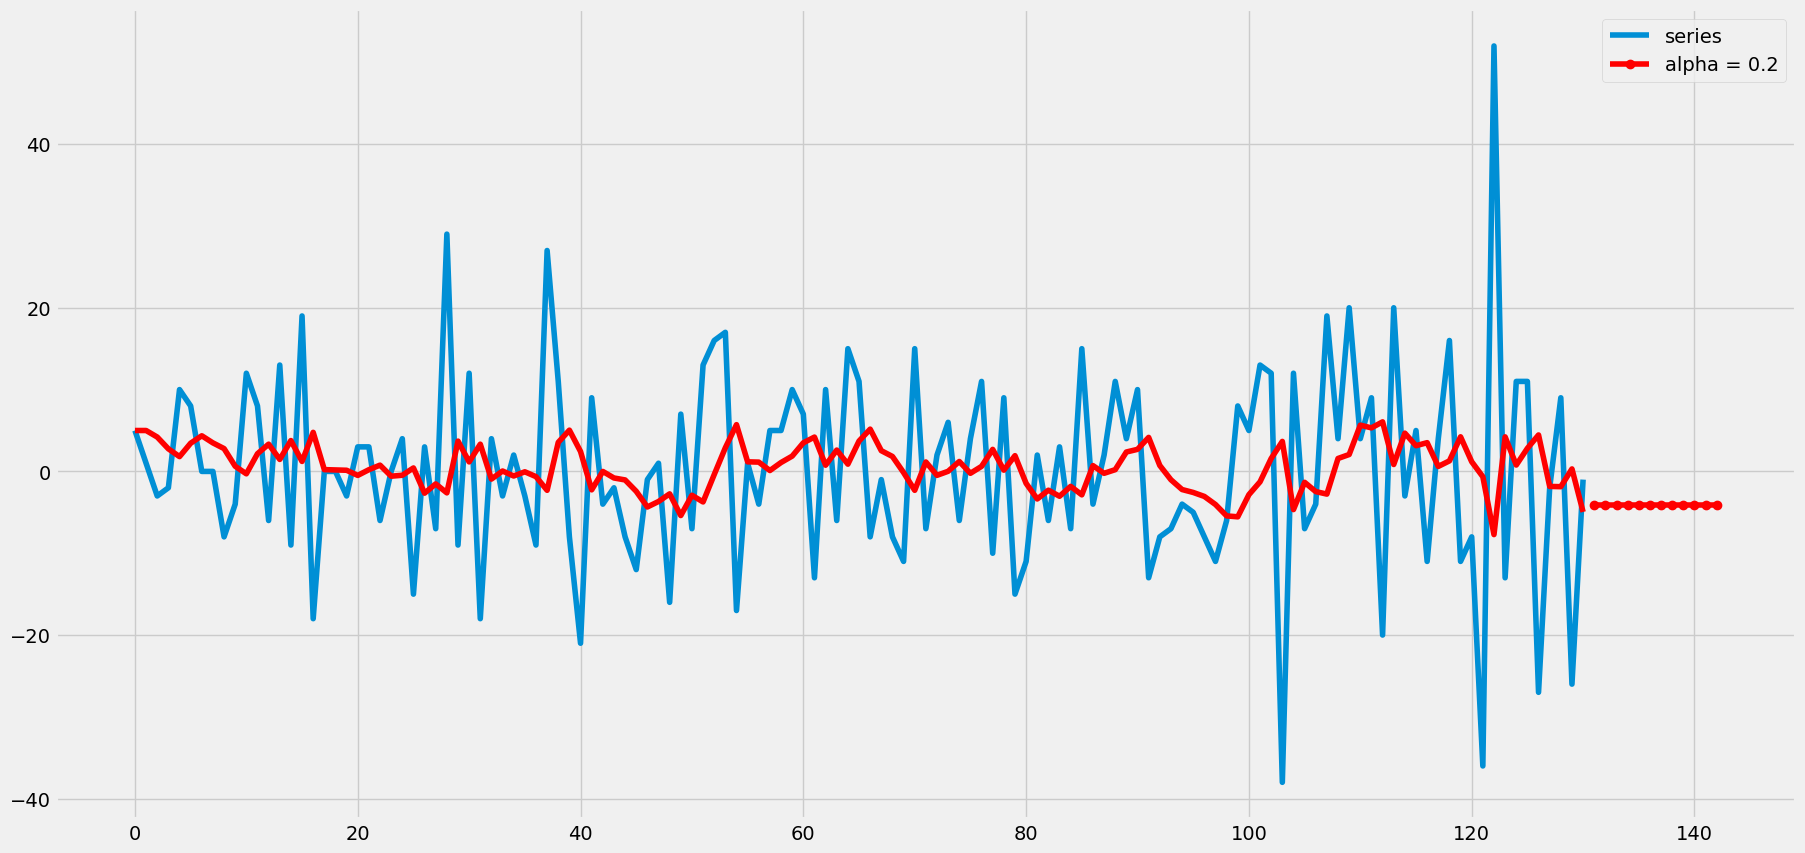

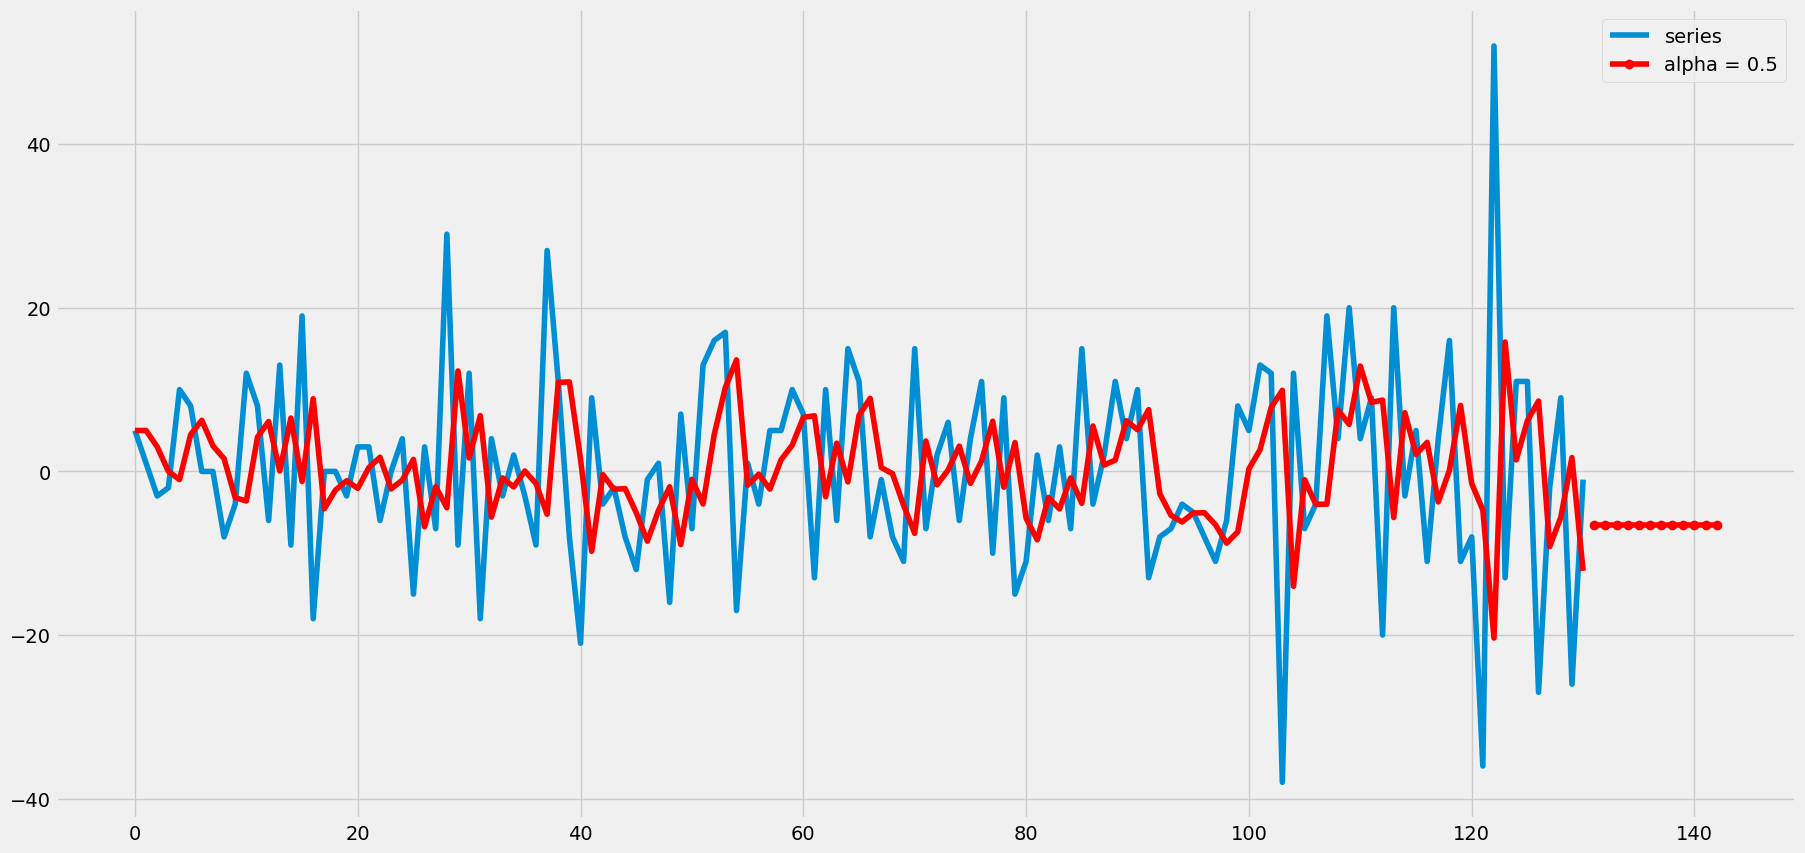

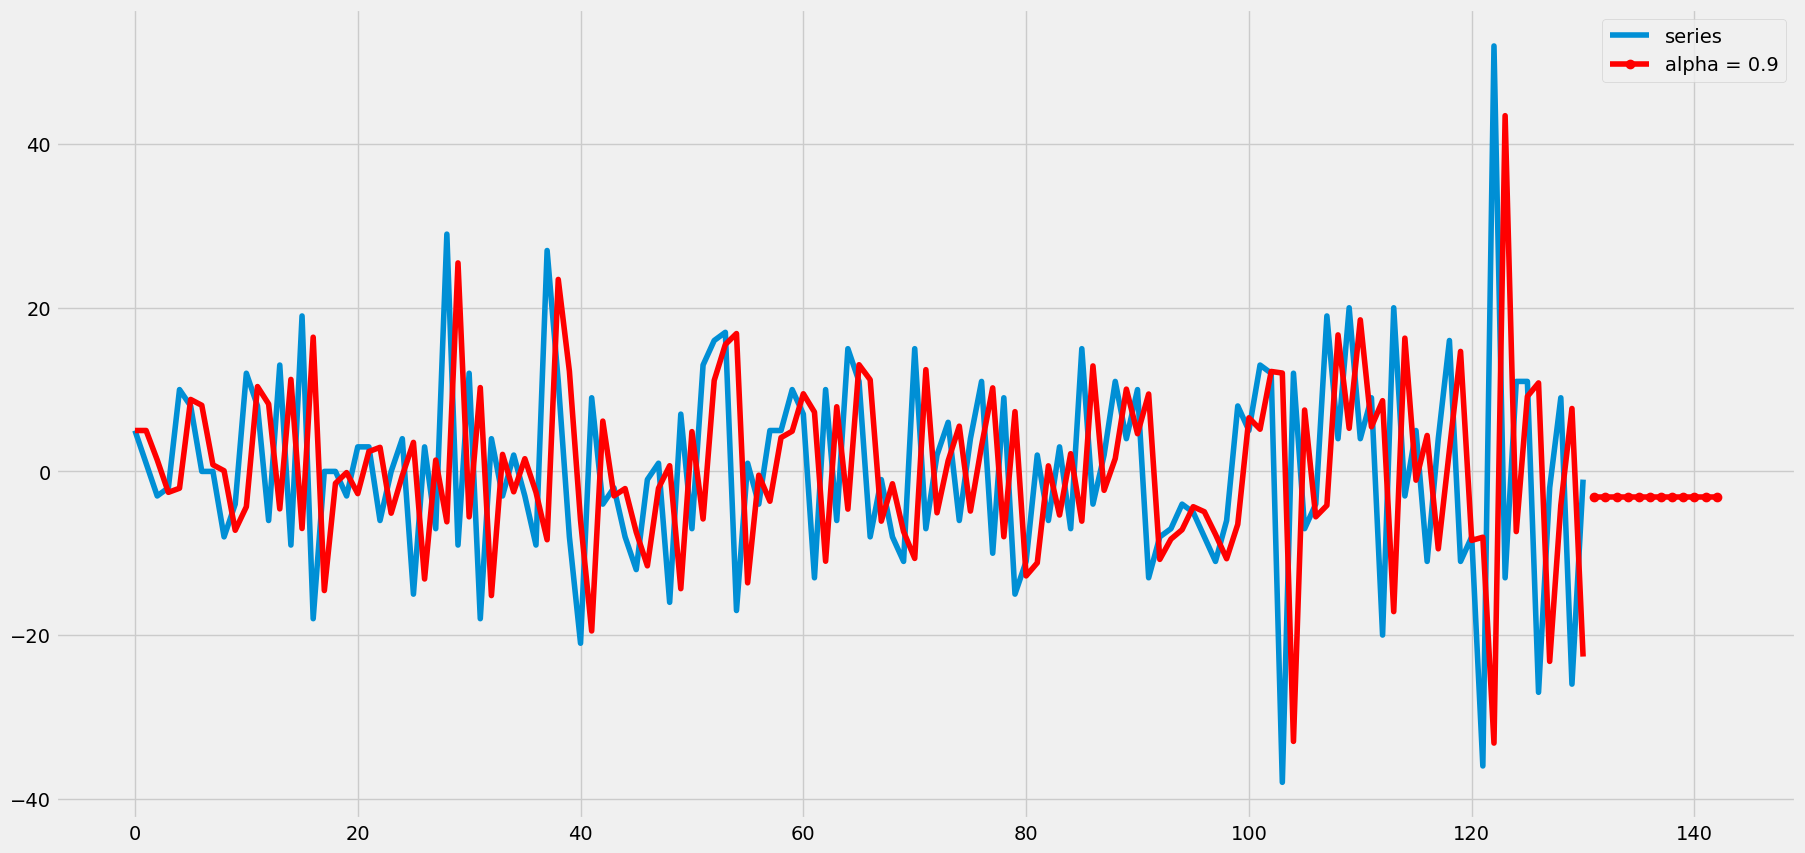

In [5]:
# SImple EMA
# The idea that the coefficient closer to 1 means less smoothing is merely a convention.
for alpha_sm in [0.2 , 0.5, 0.9]:

    df = pd.read_csv(CFG.data_folder + 'exp1.csv', header = None); df.columns = ['series']
    df.plot.line()
    fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha_sm  ,optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(  color='red')
    plt.show()

# Double Exponential Smoothing
### taking one more component in the seasonal decomposition

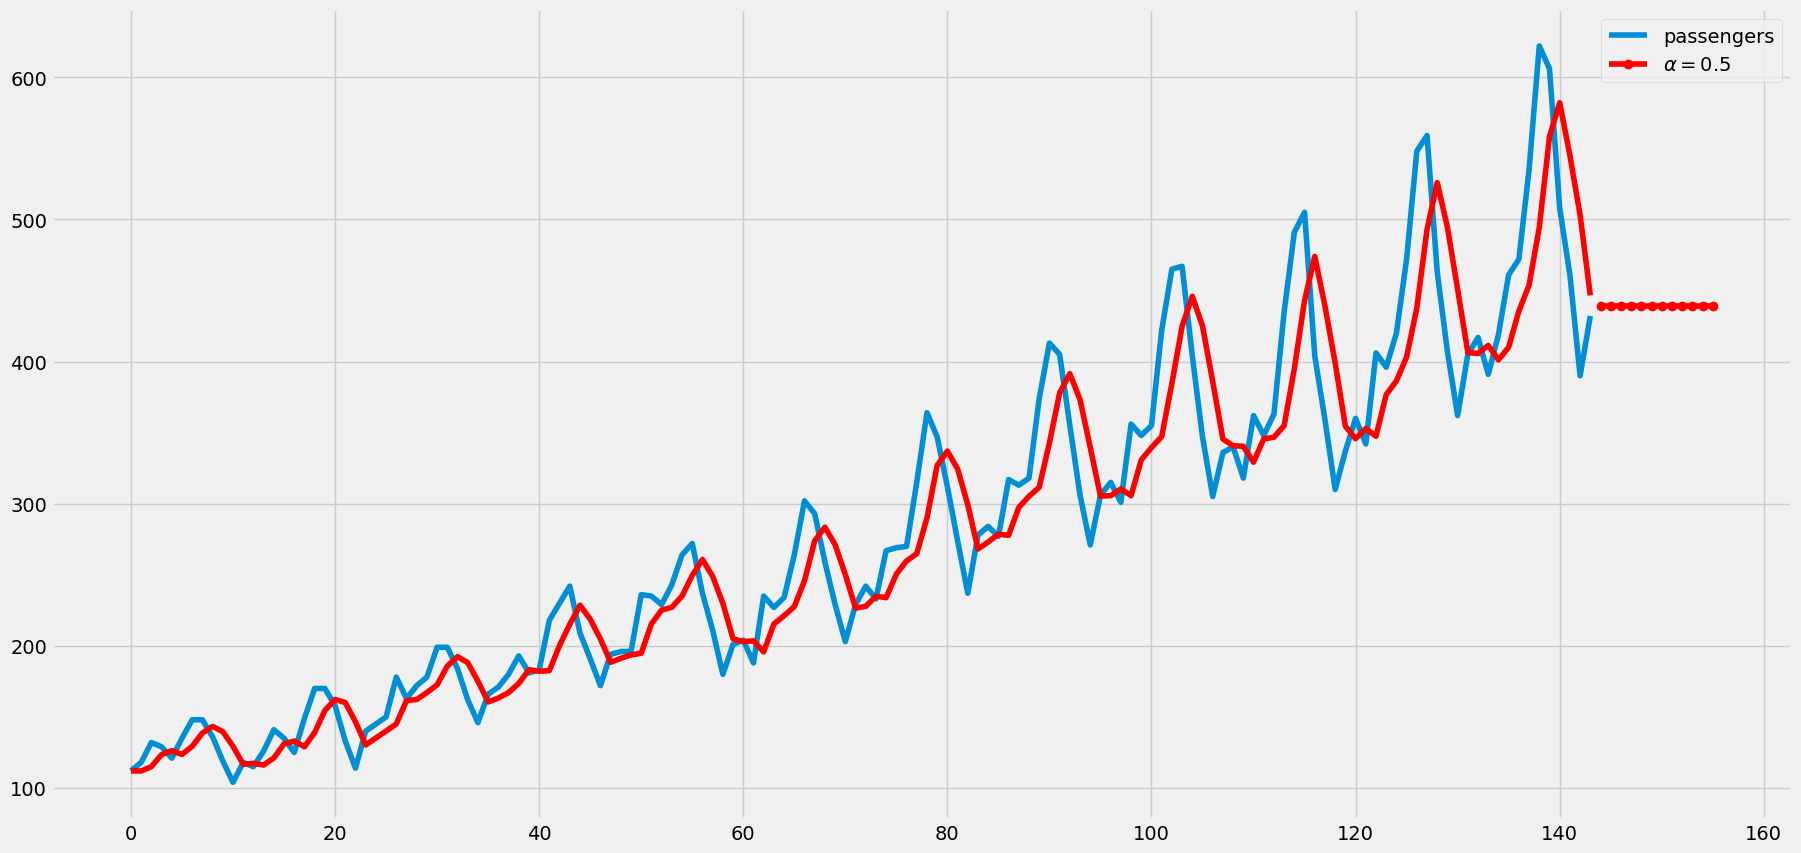

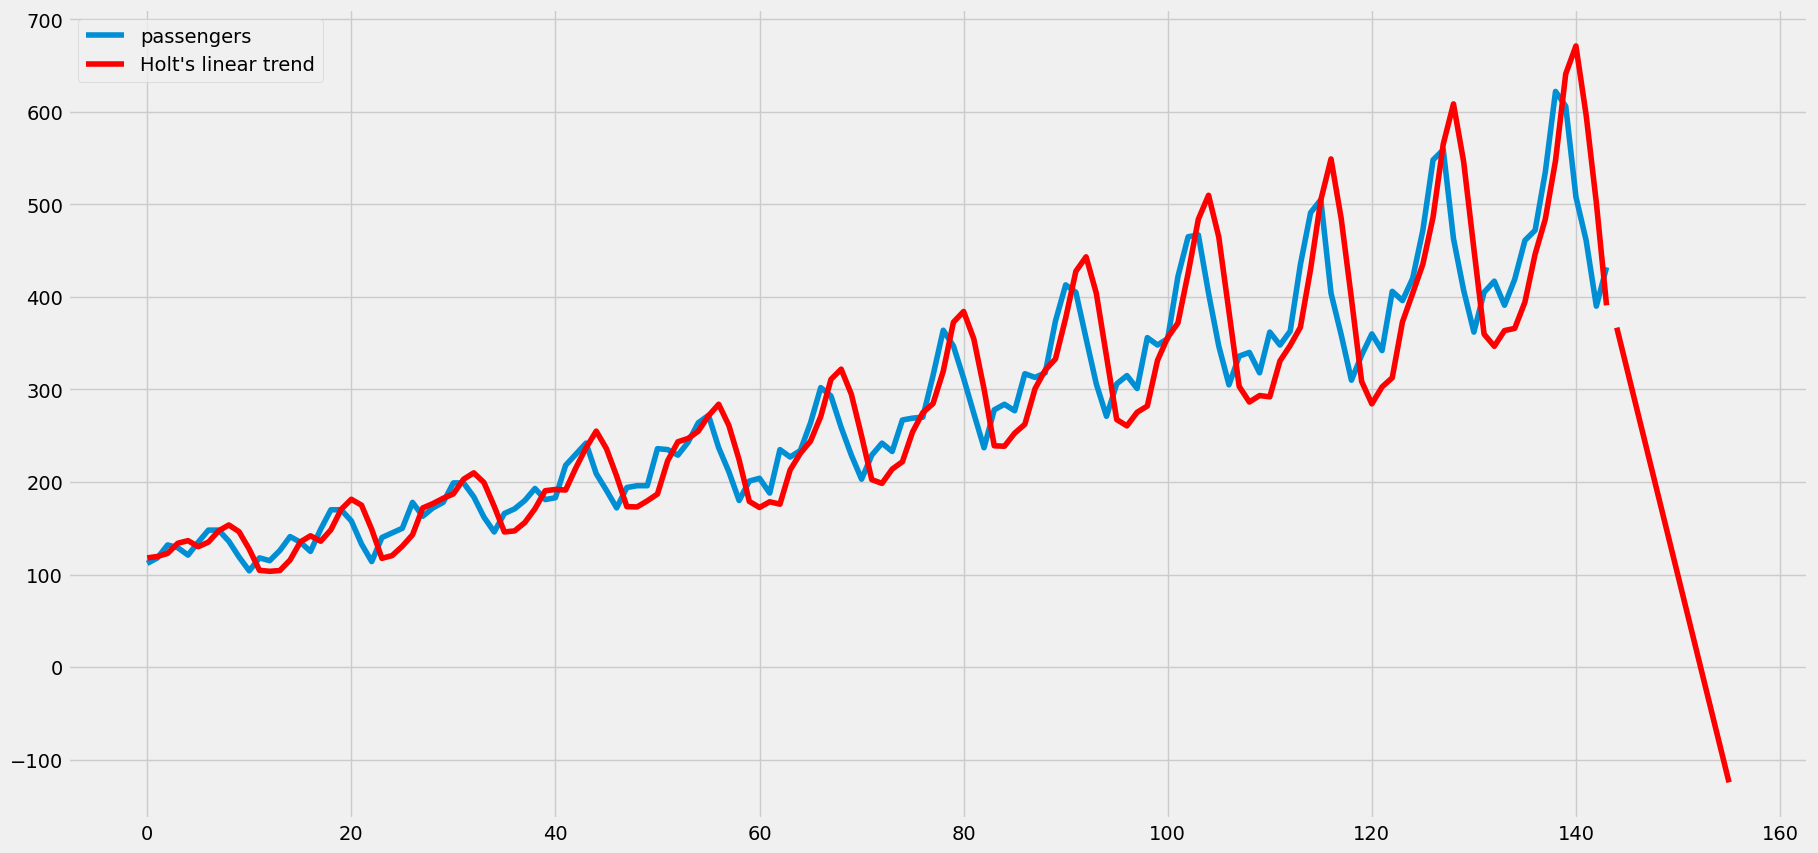

In [6]:
alpha = 0.5
df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level= alpha,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

df.plot.line()

fit1 = Holt(df).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)

plt.show()

# Triple Exponential Smoothing


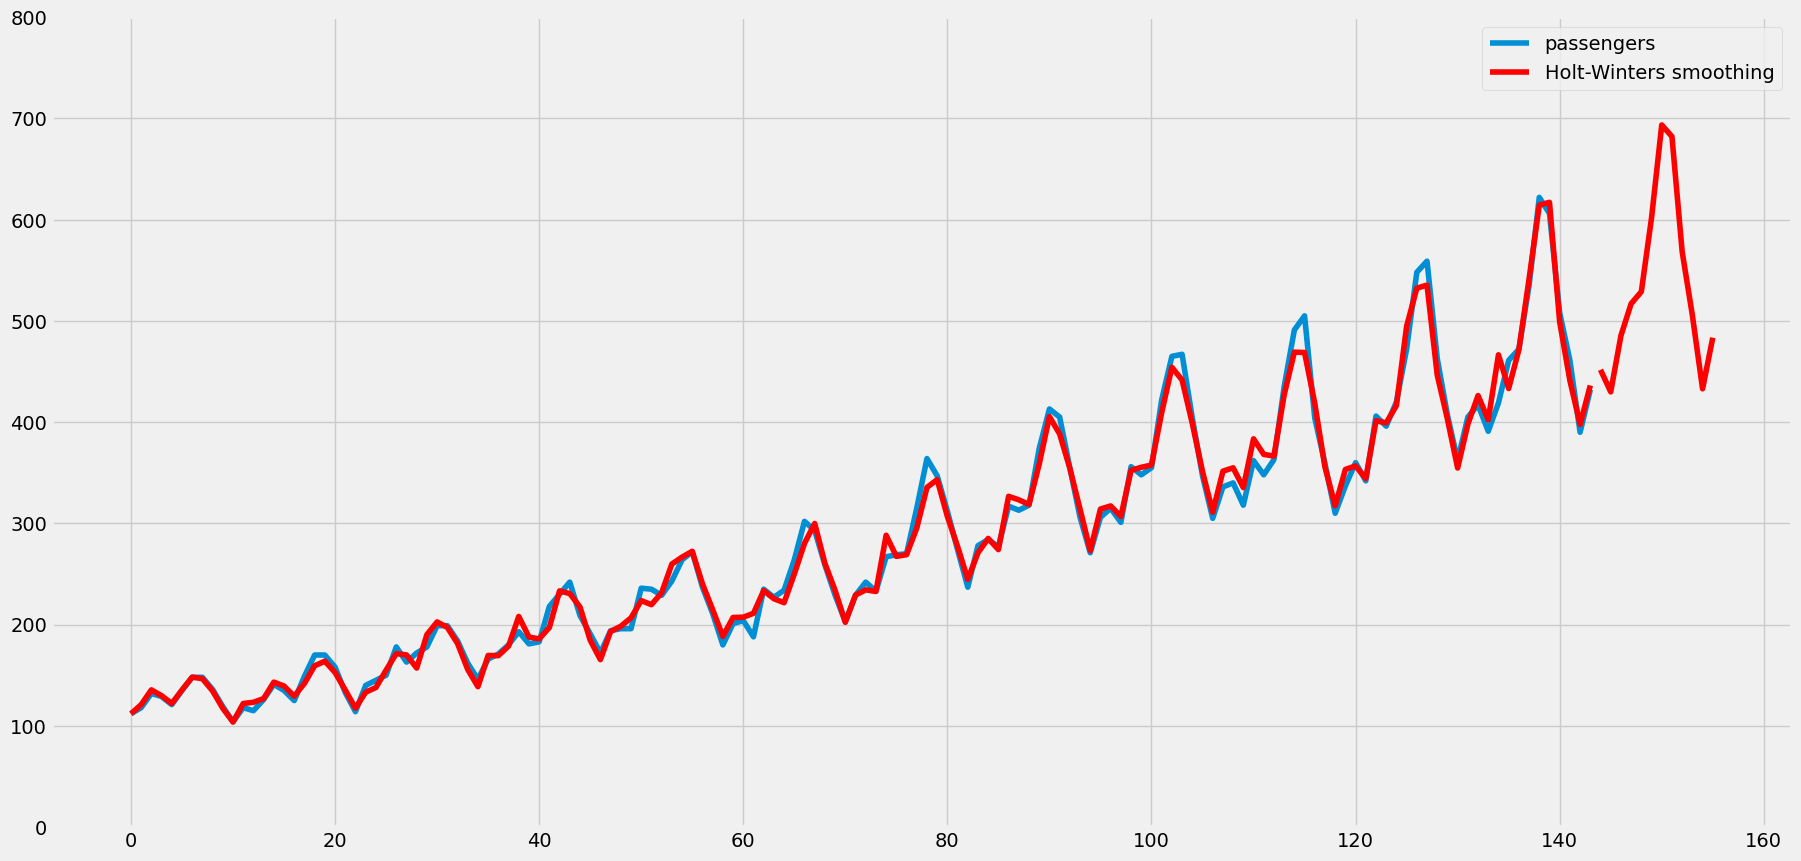

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read the data
df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols=['passengers'])

# Plot the original data
df.plot.line()

# Initialize the model
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='add', use_boxcox=True)

# Fit the model
fit1 = fit1.fit(smoothing_level=0.5)

# Plot the fitted values
fit1.fittedvalues.plot(color='red')

# Plot the forecast
fit1.forecast(12).rename("Holt-Winters smoothing").plot(color='red', legend=True)

# Show the plot with y-axis limits
plt.ylim(0, 800)
plt.show()


# Summary

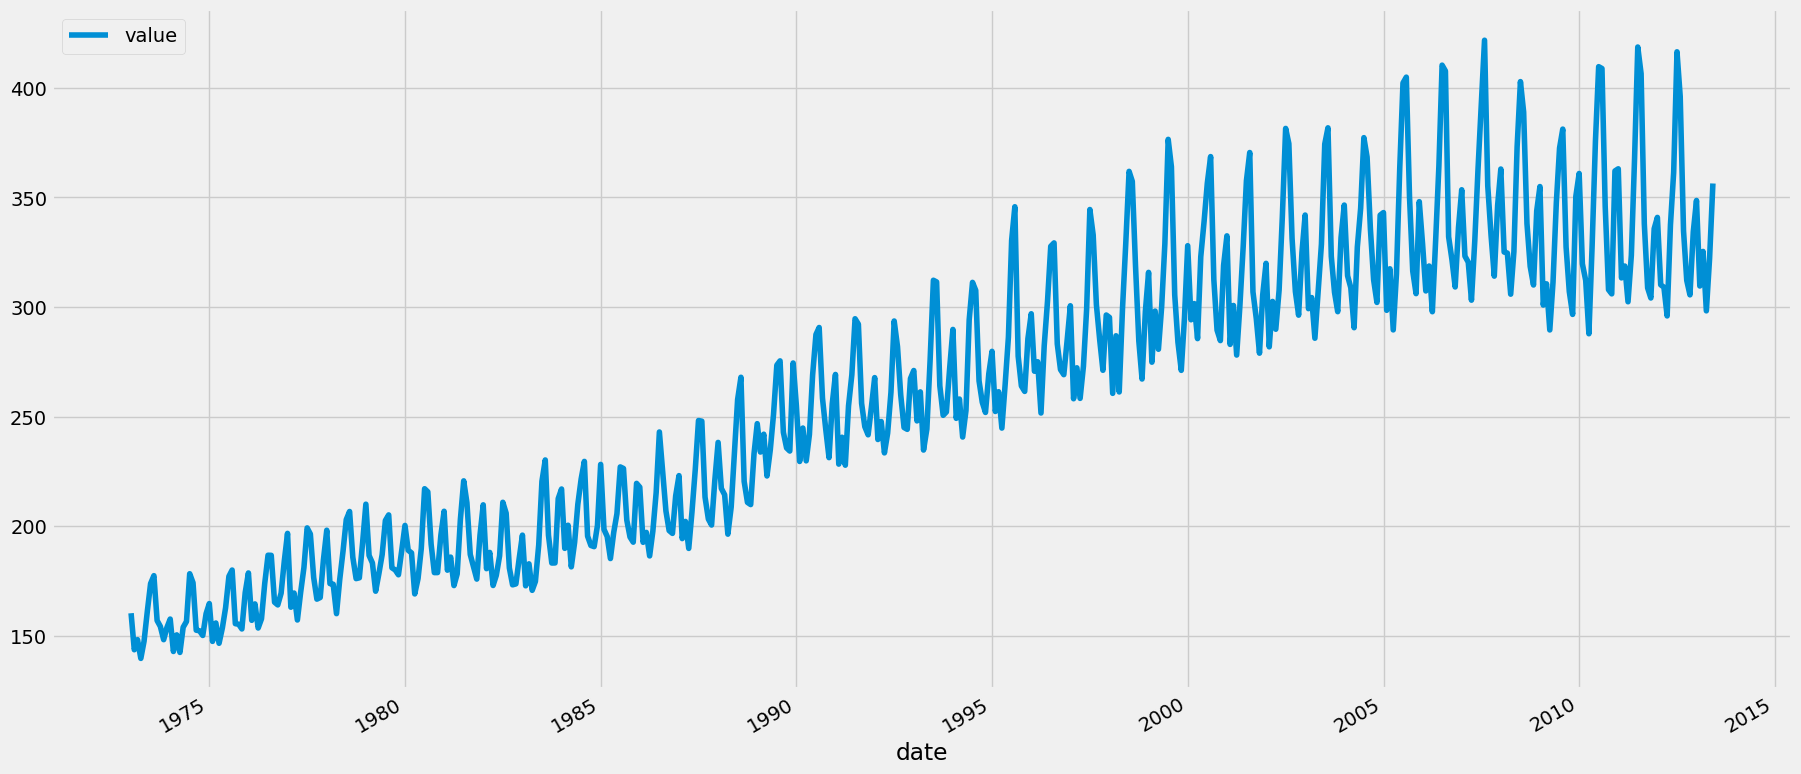

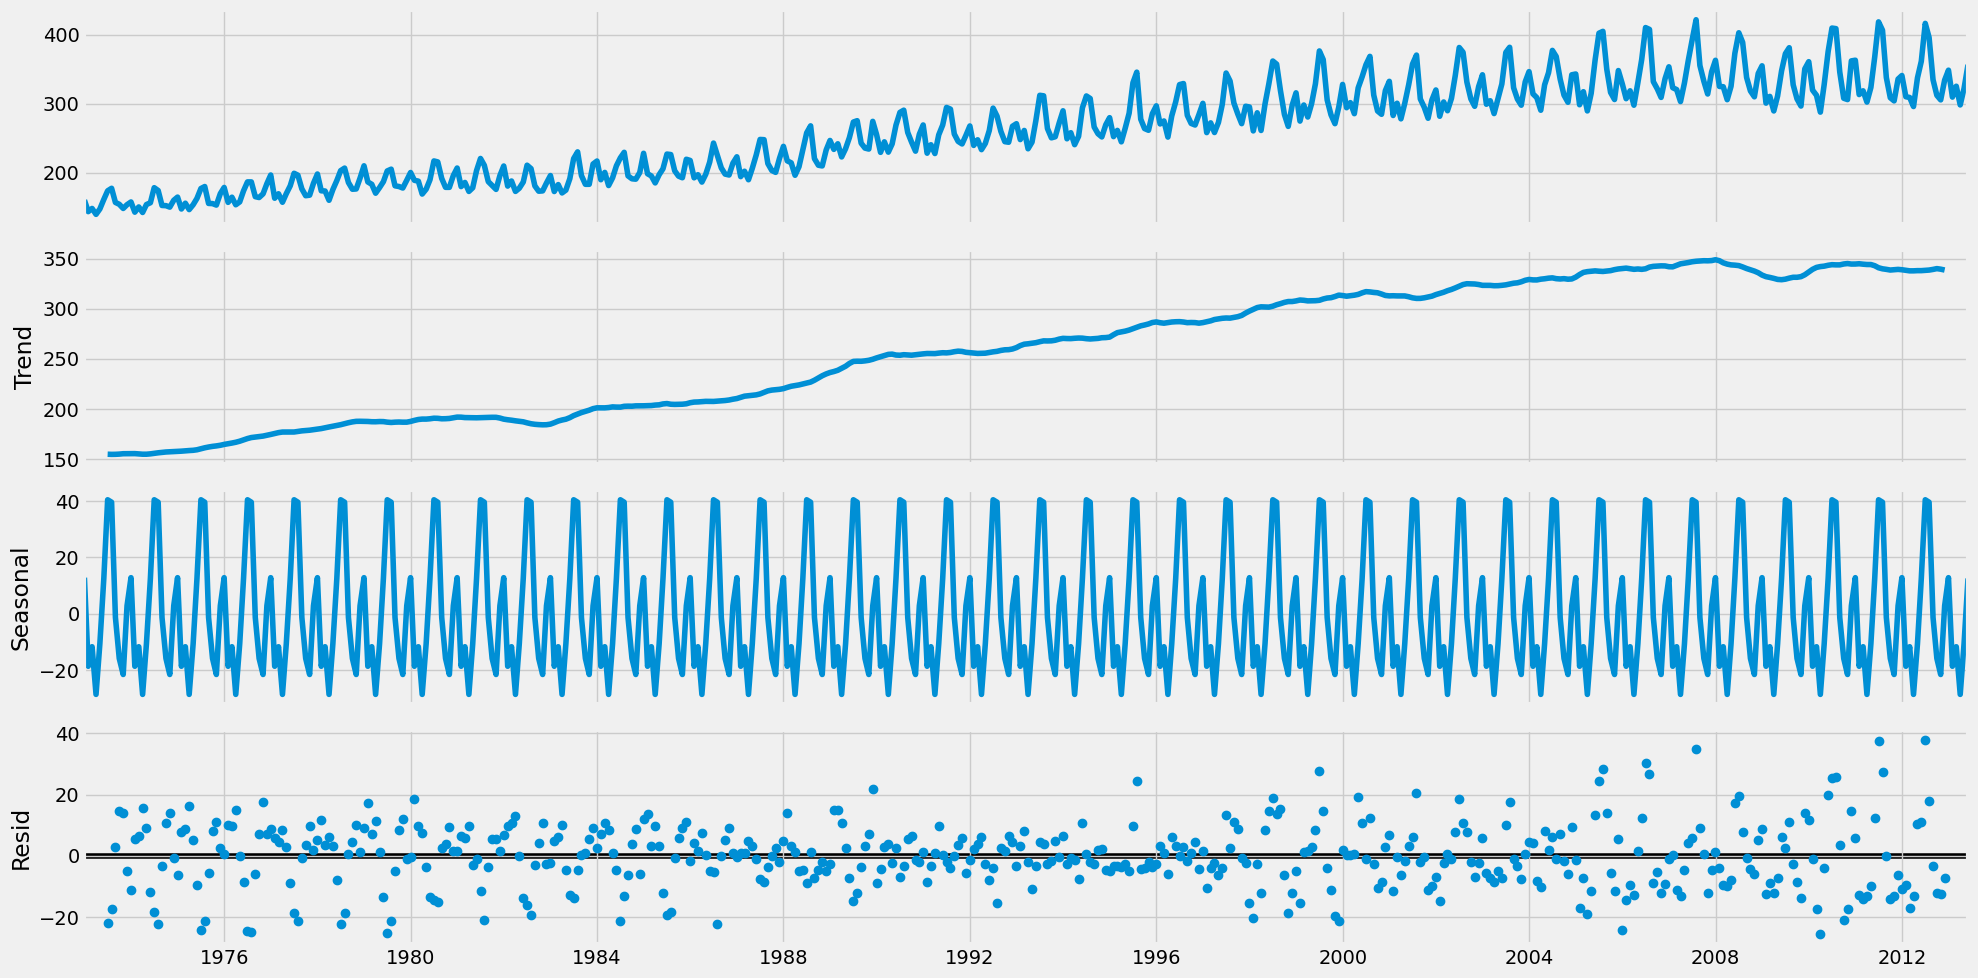

In [10]:
df = pd.read_csv(CFG.data_folder + 'us_energy.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.plot()

# perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df,period =12) 
figure = decomposition.plot()
plt.show()

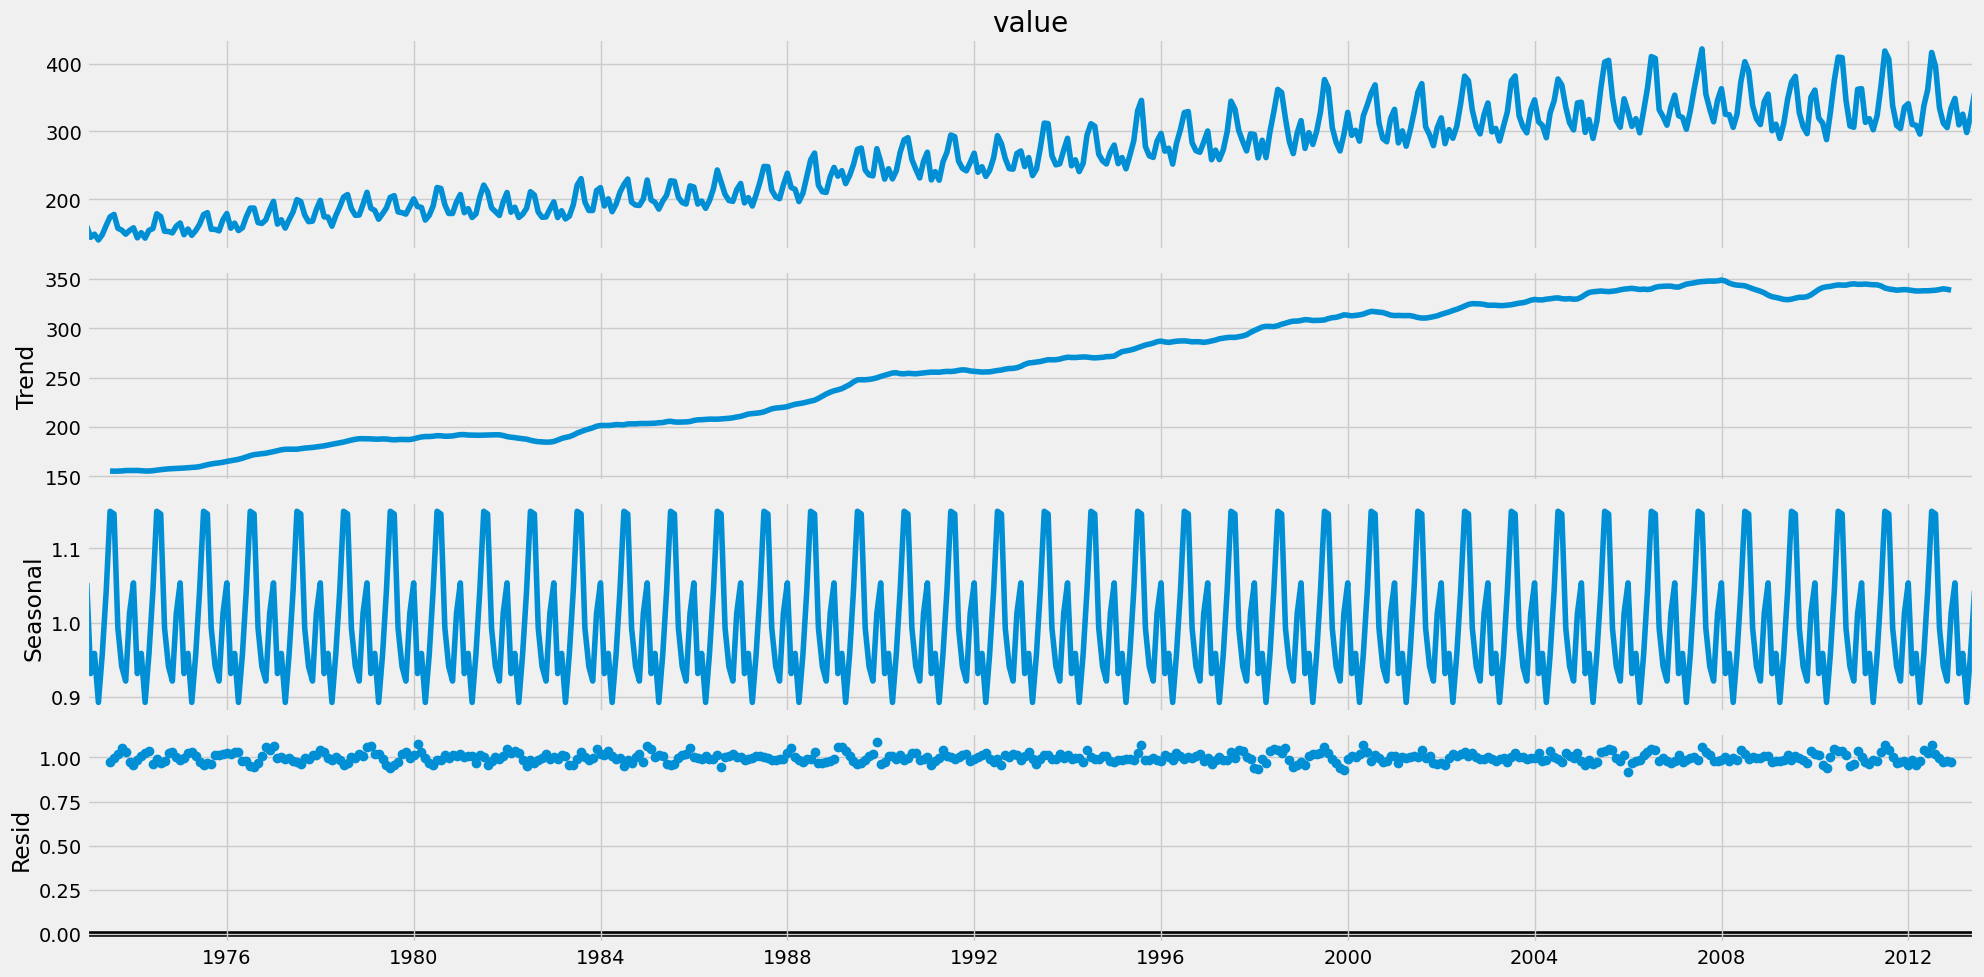

In [11]:
decomposition = sm.tsa.seasonal_decompose(df["value"],period =12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

# more stable behavior of the residuals in the second case suggests that a multiplicative decomposition is more appropriate.

In [12]:
cutoff_date = '2005-12-31'
xtrain, xvalid  = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(397, 1) (89, 1)


In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(xtrain['value'].values, seasonal_periods=12, trend='mul', seasonal='mul')
fit1 = fit1.fit()
fit1.params_formatted

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,name,param,optimized
smoothing_level,alpha,2.817754e-01,True
smoothing_trend,beta,6.213181e-08,True
smoothing_seasonal,gamma,2.263580e-01,True
initial_level,l.0,1.383864e+02,True
initial_trend,b.0,1.001948e+00,True
initial_seasons.0,s.0,1.171308e+00,True
initial_seasons.1,s.1,1.031721e+00,True
initial_seasons.2,s.2,1.059466e+00,True
initial_seasons.3,s.3,9.845292e-01,True
initial_seasons.4,s.4,1.039655e+00,True


In [20]:
# What do the residuals look like?
prediction = fit1.forecast(len(xvalid)).copy()
prediction

array([308.01911298, 321.06993109, 300.57209285, 329.34974191,
       361.2771456 , 399.4318654 , 398.96349502, 345.74286086,
       320.38185389, 309.85200128, 345.69843604, 357.23795972,
       315.29533256, 328.65444523, 307.67239428, 337.1298469 ,
       369.81145964, 408.86749403, 408.38805951, 353.91021434,
       327.95011384, 317.17151849, 353.86474009, 365.67685759,
       322.74343554, 336.4181255 , 314.94042345, 345.0937384 ,
       378.54737657, 418.52601696, 418.03525694, 362.27050214,
       335.69715595, 324.6639419 , 362.22395367, 374.31510437,
       330.36748225, 344.36520427, 322.38014254, 353.2457579 ,
       387.48965878, 428.41269954, 427.91034649, 370.82828187,
       343.62720353, 332.33335601, 370.7806338 , 383.15740921,
       338.17162895, 352.50001388, 329.99560732, 361.59034949,
       396.64318115, 438.53293151, 438.01871155, 379.58821881,
       351.74457963, 340.1839418 , 379.53944516, 392.20859248,
       346.16013006, 360.82698904, 337.79096936, 370.13

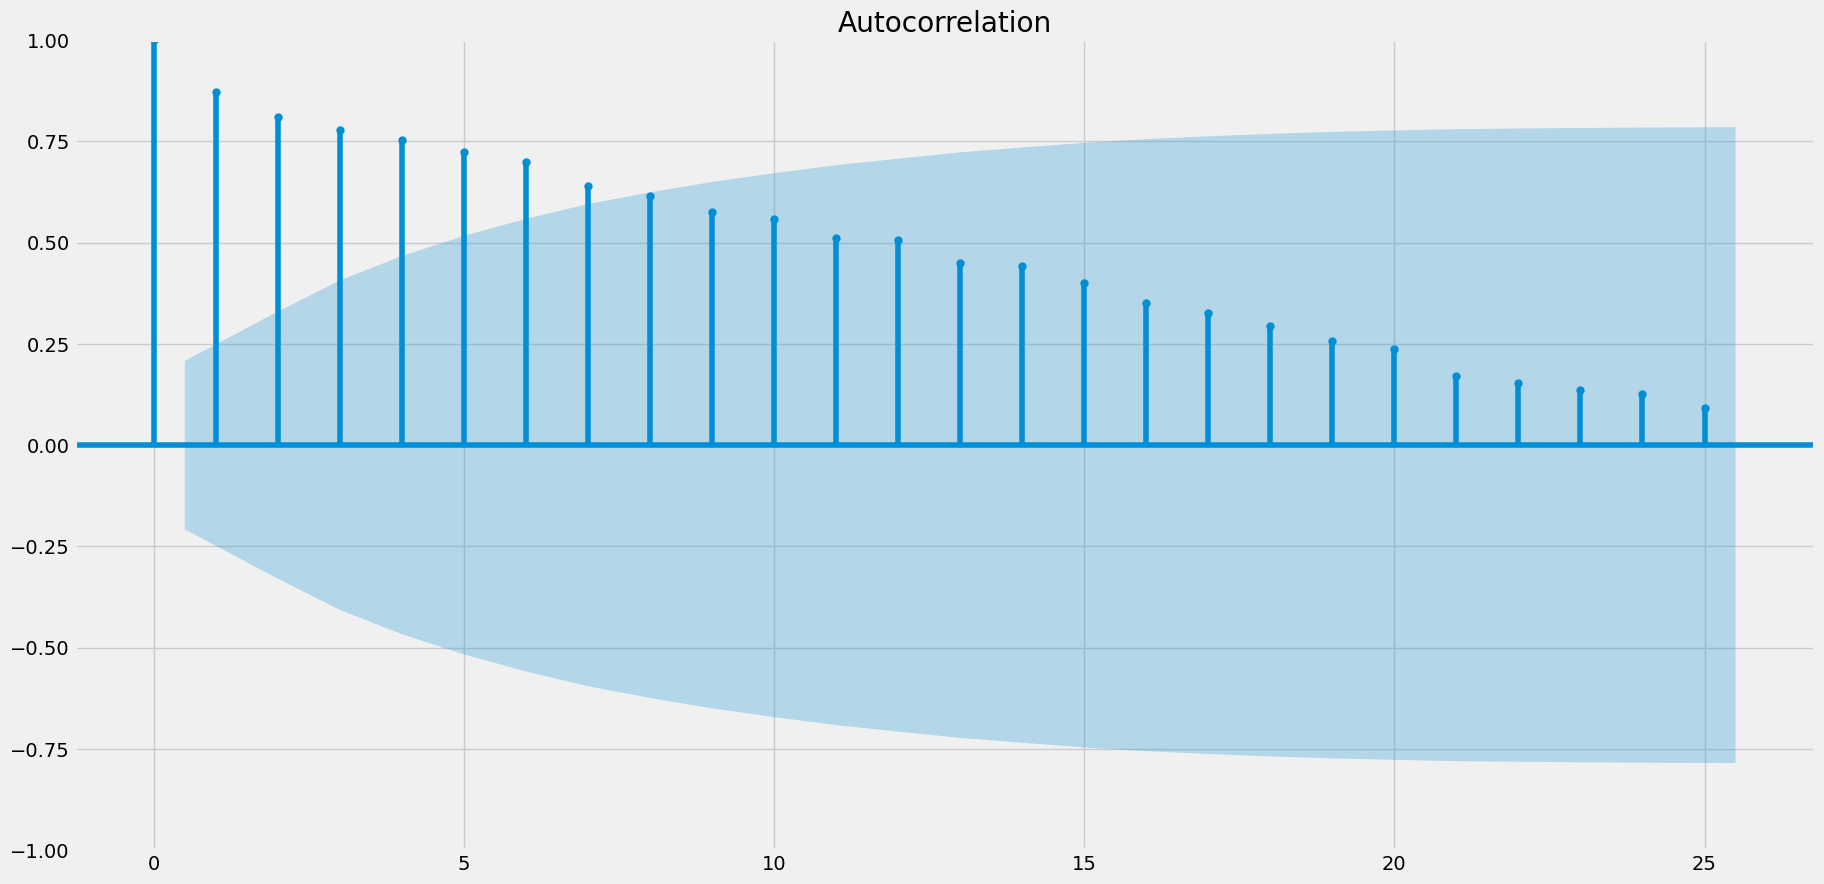

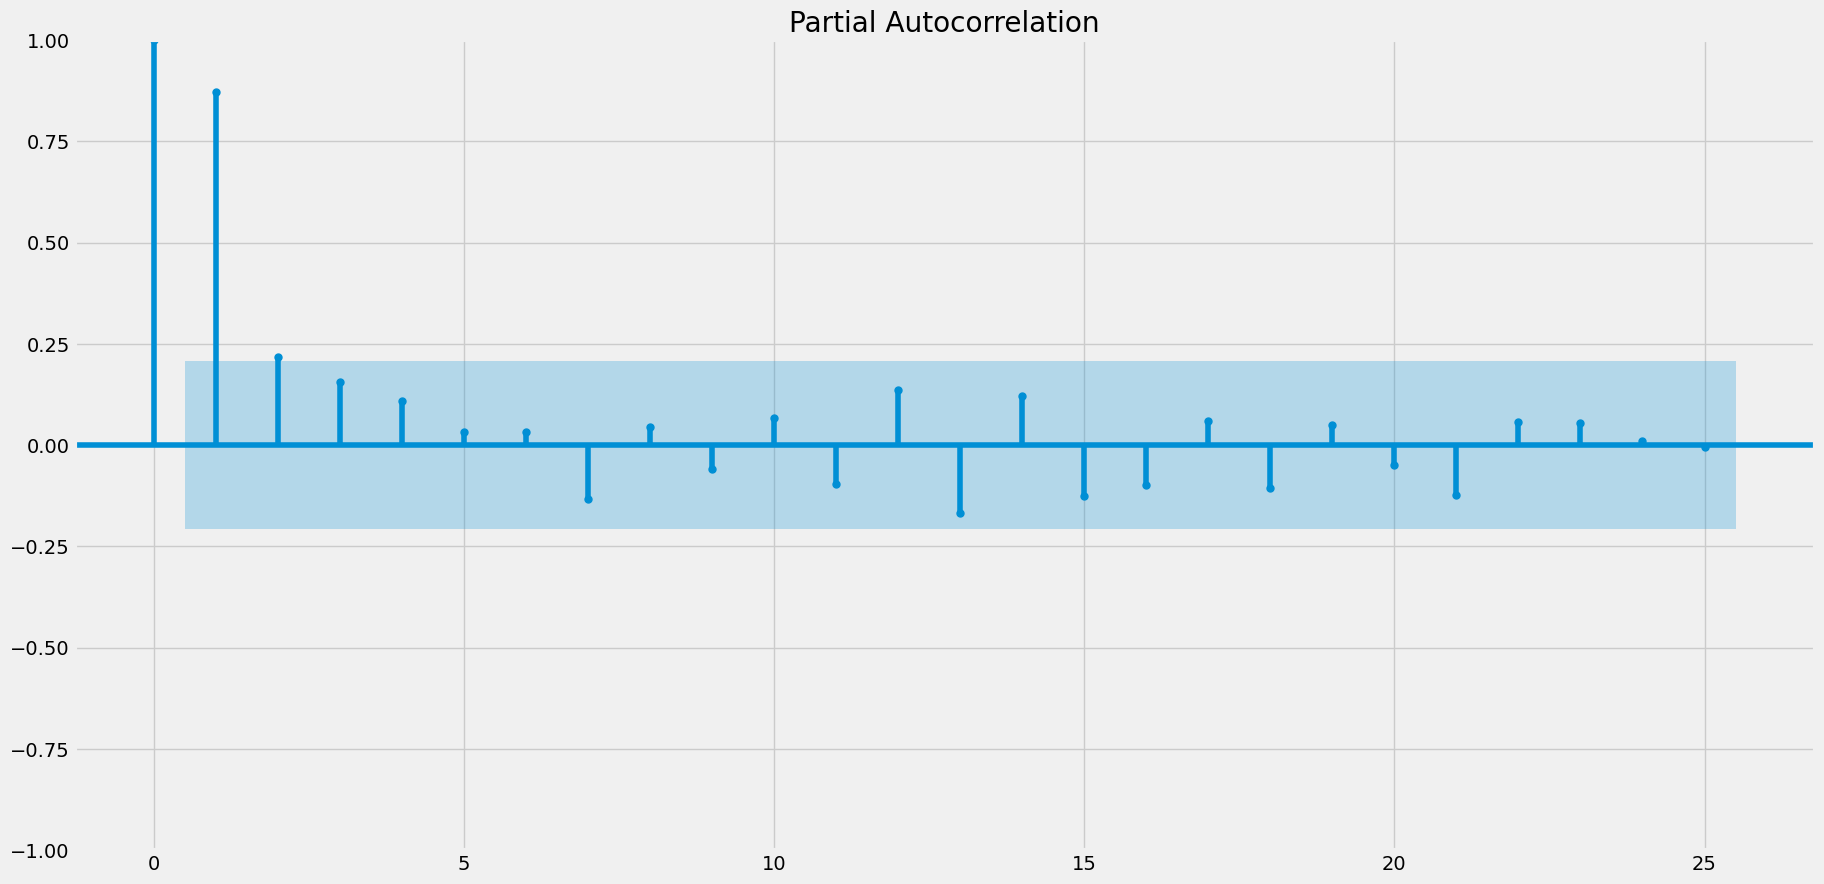

In [21]:
xresiduals = xvalid['value'] - prediction
plot_acf(xresiduals, lags = 25)
print()

plot_pacf(xresiduals, lags = 25)
print()

/tmp/ipykernel_640819/4205454841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xvalid['prediction'] = prediction


<Axes: xlabel='date'>

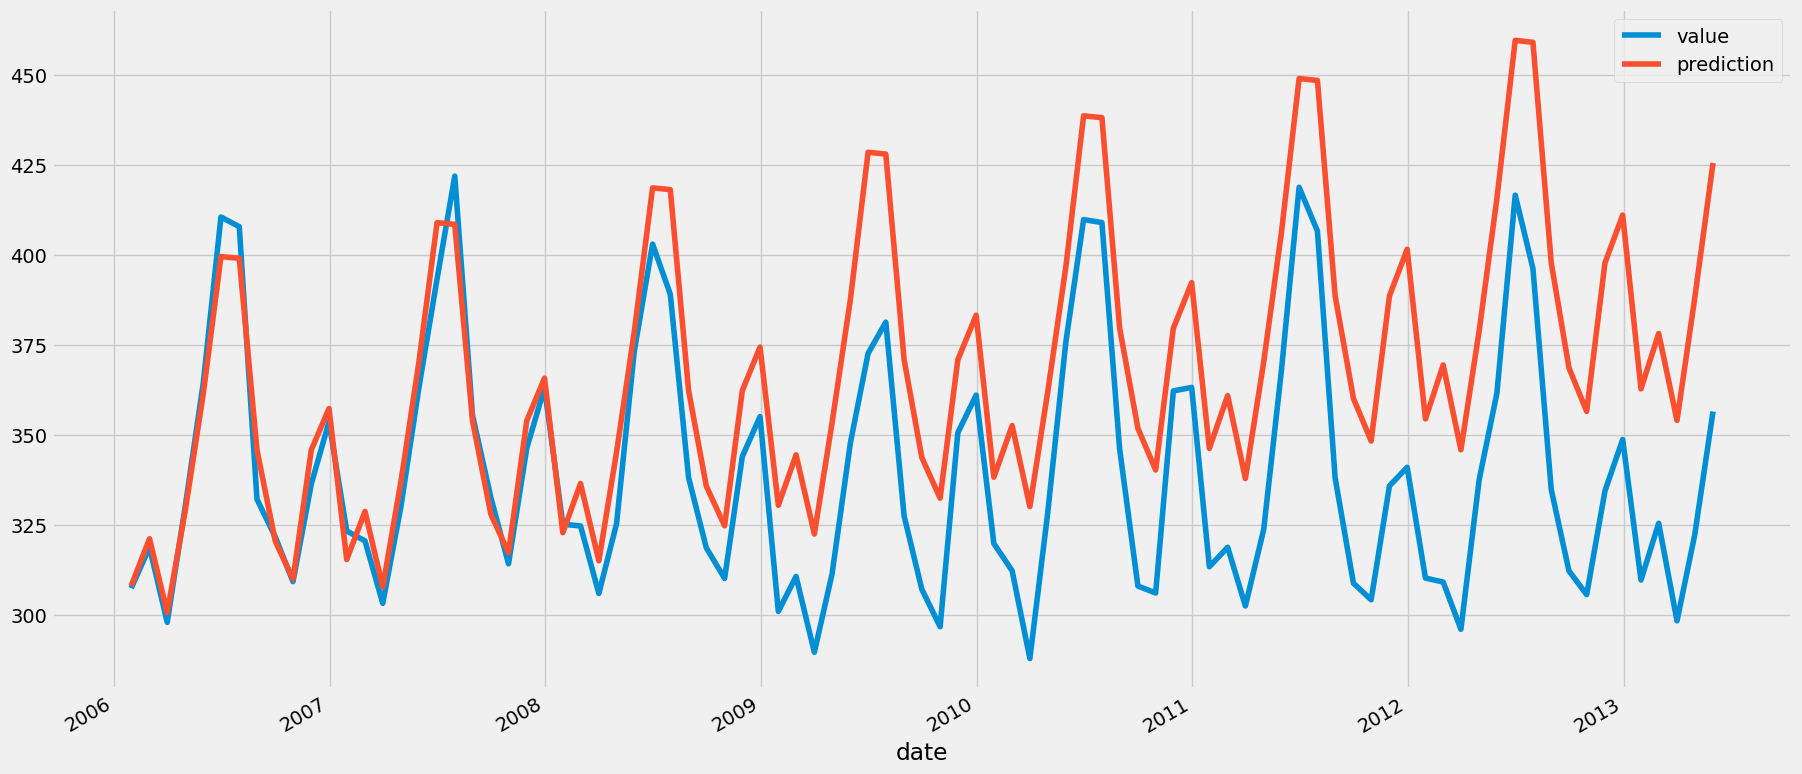

In [22]:
xvalid['prediction'] = prediction
xvalid.plot()